<a href="https://colab.research.google.com/github/Jayanth20/CSE-598/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import keras.datasets.fashion_mnist as fashion_mnist_data


In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist_data.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


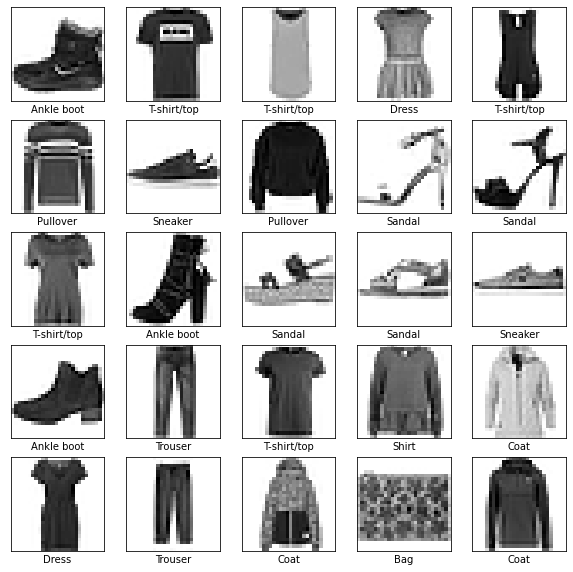

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

item = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
        5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[Y_train[i]])
plt.show()


In [6]:
img_width, img_height, no_channels = 28, 28, 1

In [7]:
IMG_PATH = "/content/gdrive/MyDrive/Images/Assignment3"
def show_plot(model_name, history, img_path = IMG_PATH):
  #Accuracy Plot
  plt.clf()

  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title(model_name + "_Accuracy")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.savefig(f"{img_path}/{model_name}_Accuracy.png")

  plt.clf()

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title(model_name + "_Loss")
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.savefig(f"{img_path}/{model_name}_Loss.png")


In [8]:
def plot_heatmap(model_name, y_pred, path):
  fig, ax = plt.subplots(figsize=(10, 10))
  sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, 
              cbar=False, fmt='1d', cmap='Blues', ax=ax)
  ax.set_title('Confusion Matrix', loc='left', fontsize=16)
  ax.set_xlabel('Predicted')
  ax.set_ylabel('Actual')
  ax.set_xticklabels(item.values())
  ax.set_yticklabels(item.values(), rotation=0)
  plt.savefig(f"{path}/{model_name}_heatmap.png")

In [9]:
def buildModel1(hidden_layers, name_of_model):
  model = Sequential([
      keras.layers.Rescaling(1./255, input_shape = (img_height, img_width, no_channels)) ] + hidden_layers + [keras.layers.Flatten(), keras.layers.Dense(10)], name = name_of_model)

  # model.summary()
  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
  
  history = model.fit(X_train, Y_train, batch_size = 32, validation_split = 0.2, epochs = 20)
  loss, accuracy = model.evaluate(X_test, Y_test)
   # predicted values
  y_pred_enc = model.predict(X_test)
  # decoding predicted values
  y_pred = [np.argmax(i) for i in y_pred_enc]
  show_plot(name_of_model, history, IMG_PATH + "/Part1")
  plot_heatmap(name_of_model, y_pred, IMG_PATH + "/Part1")
  print(f"Test Accuracy for {name_of_model}", accuracy)
  return loss, accuracy


Epoch 1/20
1500/1500 [==============================] - 15s 4ms/step - loss: 0.3969 - accuracy: 0.8606 - val_loss: 0.3195 - val_accuracy: 0.8892
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2789 - accuracy: 0.8996 - val_loss: 0.3011 - val_accuracy: 0.8906
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2345 - accuracy: 0.9148 - val_loss: 0.3152 - val_accuracy: 0.8898
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2022 - accuracy: 0.9278 - val_loss: 0.2878 - val_accuracy: 0.9018
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1765 - accuracy: 0.9360 - val_loss: 0.2944 - val_accuracy: 0.8983
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1533 - accuracy: 0.9453 - val_loss: 0.3022 - val_accuracy: 0.8991
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1328 - accuracy: 0.9528 - val_loss: 0.3285 - val_accuracy

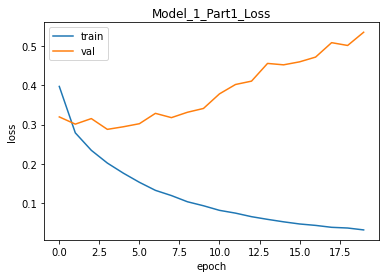

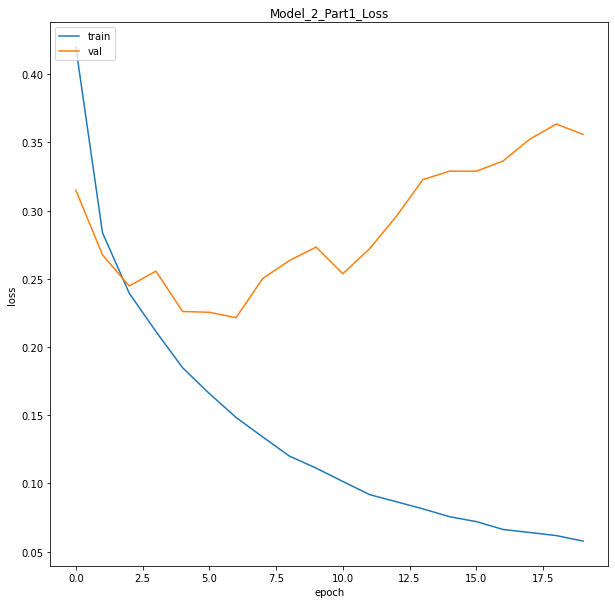

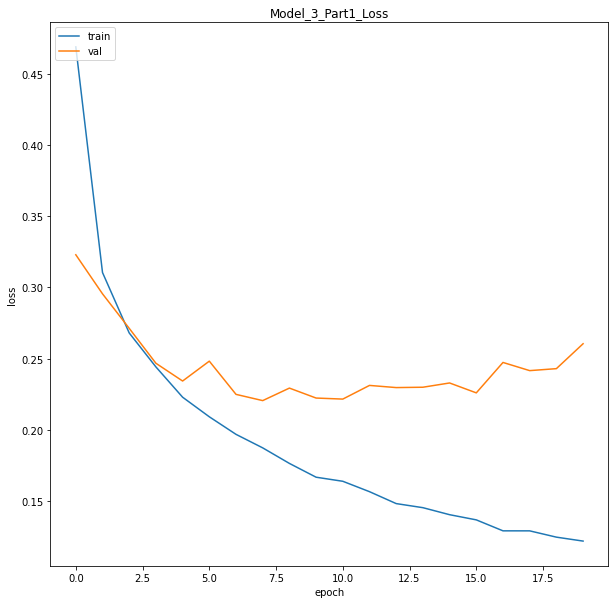

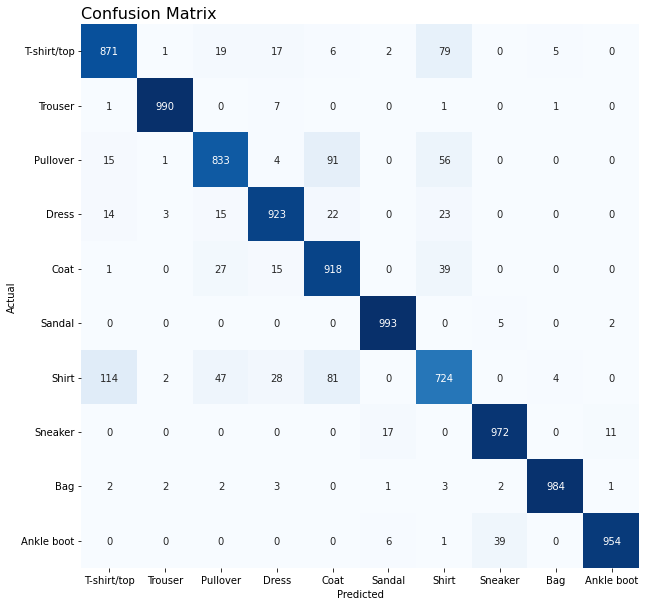

In [10]:
model_results_part1 = []

layers = [
    [keras.layers.Conv2D(64, 3, padding = "same", activation = "relu")],

    [keras.layers.Conv2D(64, 3, padding = "same", activation = "relu"), 
     keras.layers.MaxPooling2D(), 
     keras.layers.Dropout(0.2), 
     keras.layers.Conv2D(64, 3, padding = "same", activation = "relu")],

    [keras.layers.Conv2D(64, 3, padding = "same", activation = "relu"), 
     keras.layers.MaxPooling2D(), 
     keras.layers.Dropout(0.2), 
     keras.layers.Conv2D(64, 3, padding = "same", activation = "relu"), 
     keras.layers.MaxPooling2D(), keras.layers.Dropout(0.2), 
     keras.layers.Conv2D(64, 3, padding = "same", activation = "relu")],
]

model_results_part1.append(buildModel1(layers[0], "Model_1_Part1"))
model_results_part1.append(buildModel1(layers[1], "Model_2_Part1"))
model_results_part1.append(buildModel1(layers[2], "Model_3_Part1"))

In [11]:
from torch.nn.modules.flatten import Flatten
from torch.nn.modules.dropout import Dropout
from torch.nn.modules import activation

def buildModel2(name_of_model, filters = 16):
  model = Sequential([
      keras.layers.Rescaling(1/255, input_shape = (img_height, img_width, no_channels)),
      keras.layers.Conv2D(filters, 3, strides = 1, padding = 'same', activation = 'relu'),
      keras.layers.MaxPooling2D(pool_size=(2, 2)),
      keras.layers.Dropout(0.25),
      keras.layers.Conv2D(filters, 3, strides = 1, padding='same', activation='relu'),
      keras.layers.MaxPooling2D(pool_size=(2, 2)),
      keras.layers.Dropout(0.25),
      keras.layers.Conv2D(filters, 3, strides = 1, padding='same', activation='relu'),
      keras.layers.Flatten(),
      keras.layers.Dense(128),
      keras.layers.Dense(10)
  ], name = name_of_model)

  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )
  history = model.fit(X_train, Y_train, validation_split = 0.2, batch_size = 32, epochs = 20)
  loss, accuracy = model.evaluate(X_test, Y_test)
  # predicted values
  y_pred_enc = model.predict(X_test)
  # decoding predicted values
  y_pred = [np.argmax(i) for i in y_pred_enc]
  show_plot(name_of_model, history, IMG_PATH + "/Part2")
  plot_heatmap(name_of_model, y_pred, IMG_PATH + "/Part2")
  print(f"Test Accuracy for {name_of_model}", accuracy)
  return model, loss, accuracy

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.9315 - accuracy: 0.6436 - val_loss: 0.7254 - val_accuracy: 0.7166
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7807 - accuracy: 0.6994 - val_loss: 0.6661 - val_accuracy: 0.7602
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7514 - accuracy: 0.7109 - val_loss: 0.6593 - val_accuracy: 0.7408
Epoch 4/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.7293 - accuracy: 0.7199 - val_loss: 0.6763 - val_accuracy: 0.7338
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7221 - accuracy: 0.7239 - val_loss: 0.6767 - val_accuracy: 0.7466
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7083 - accuracy: 0.7301 - val_loss: 0.6214 - val_accuracy: 0.7757
Epoch 7/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.6947 - accuracy: 0.7374 - val_loss: 0.5955 - val_accuracy:

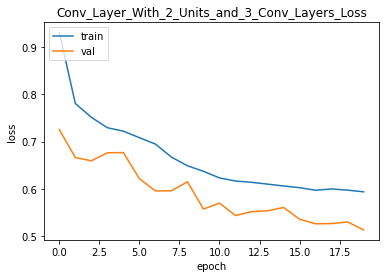

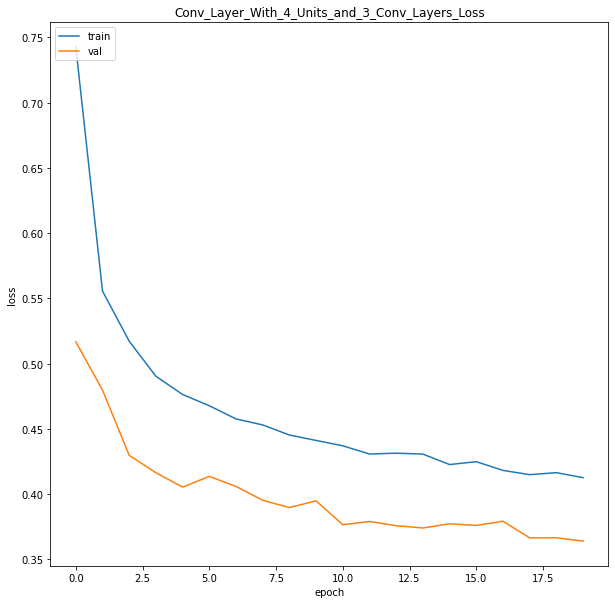

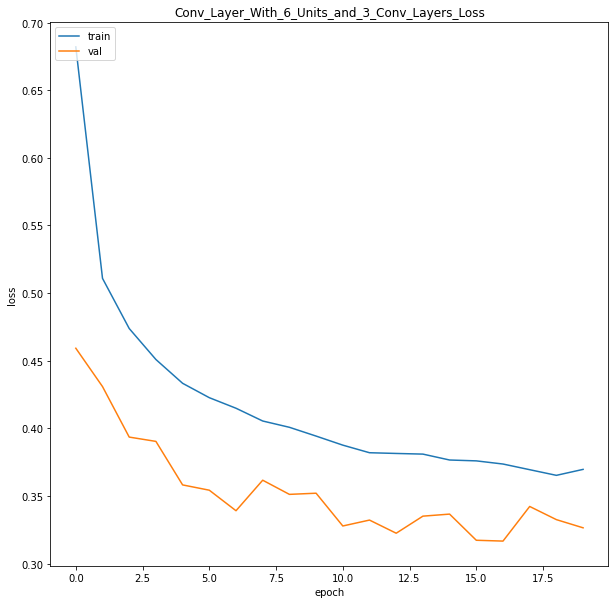

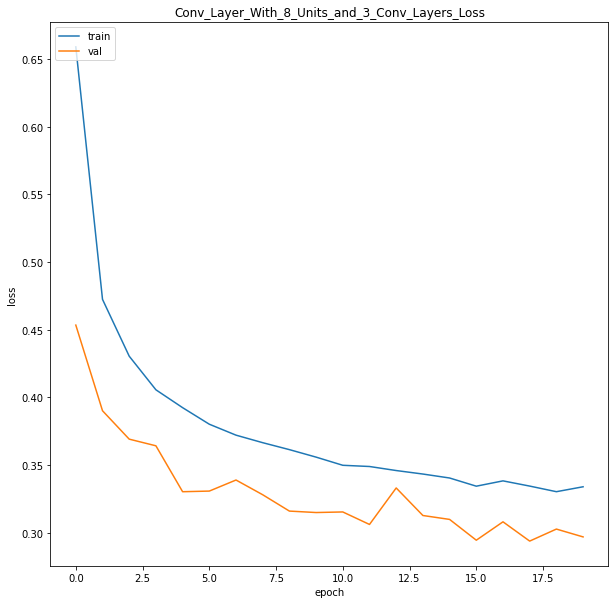

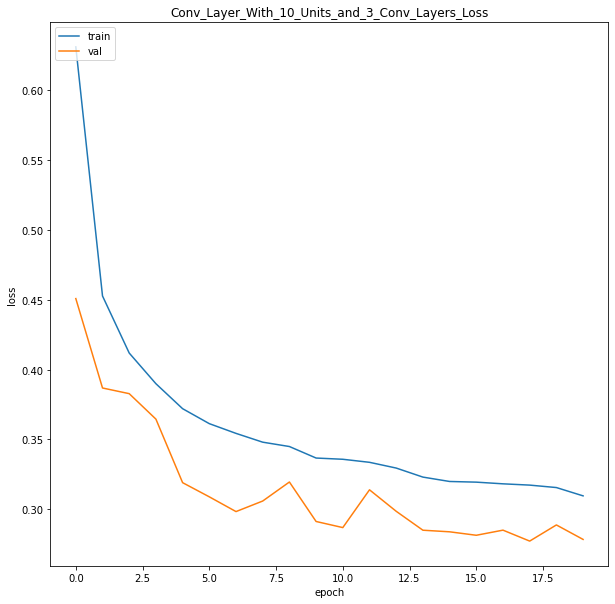

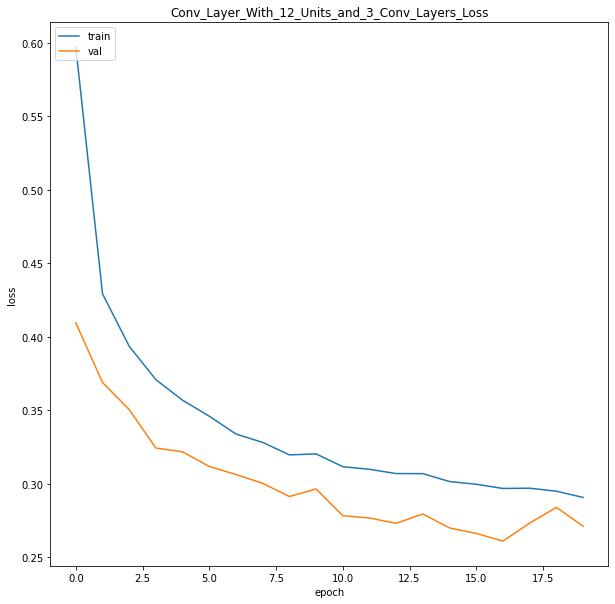

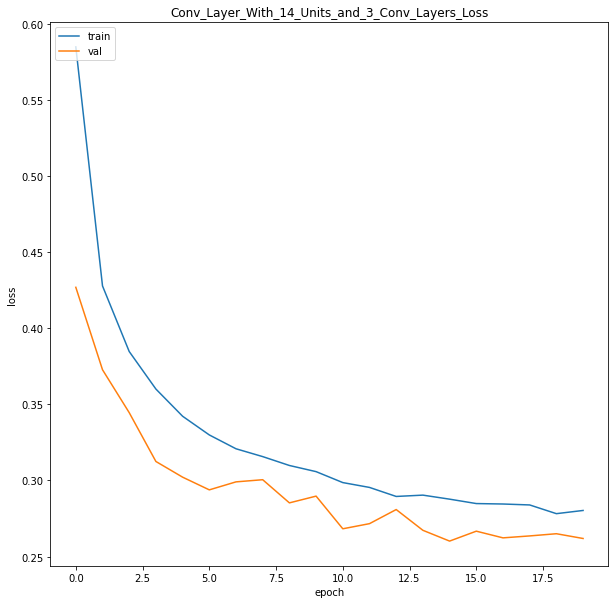

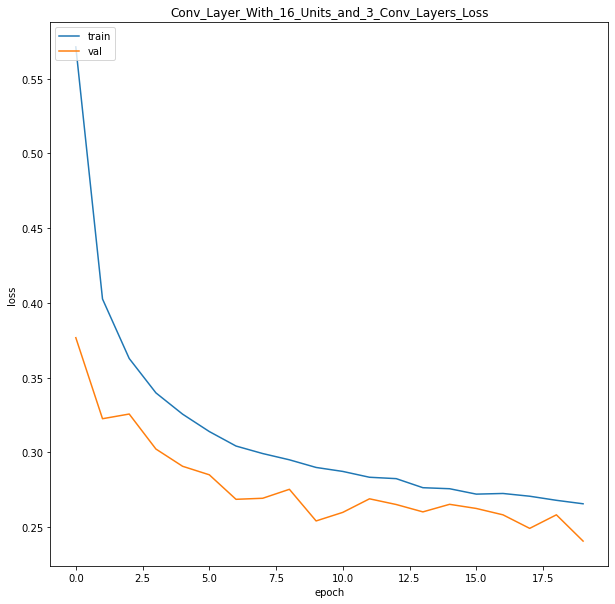

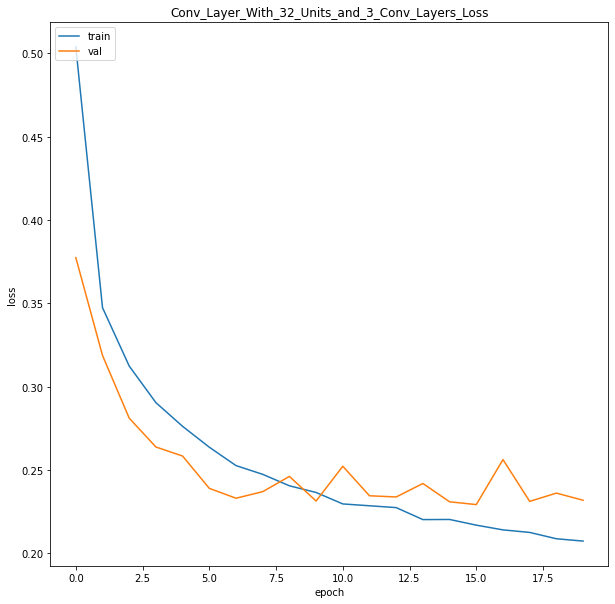

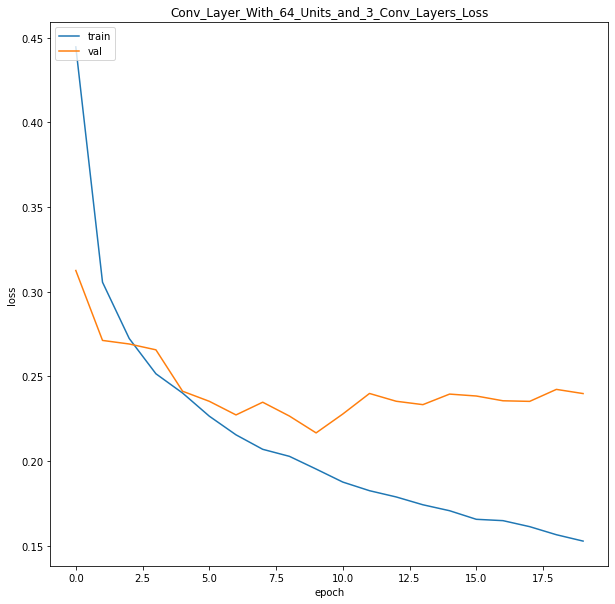

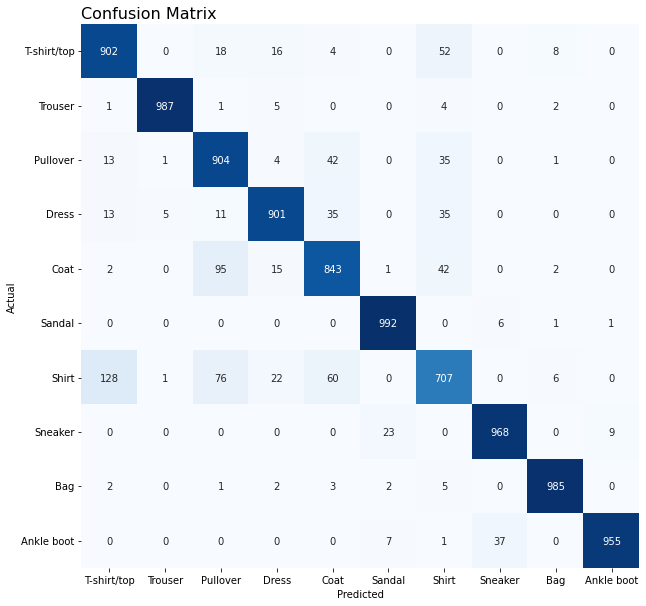

In [12]:
model_results_part2 = []
num_units = [2, 4, 6, 8, 10, 12, 14, 16, 32, 64]
for unit in num_units:
  model_name = f"Conv_Layer_With_{unit}_Units_and_3_Conv_Layers"
  model_results_part2.append(buildModel2(model_name, unit))

In [13]:
print(model_results_part1)

[(0.5502033233642578, 0.891700029373169), (0.3701994717121124, 0.9147999882698059), (0.28204143047332764, 0.9161999821662903)]


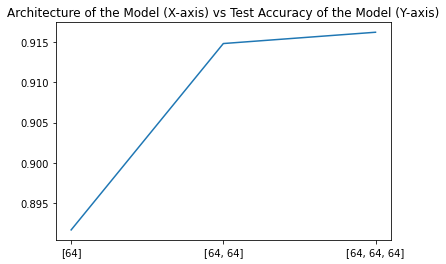

In [14]:

x_axis = [ "[64]", "[64, 64]", "[64, 64, 64]"]
y_axis = [ x[1] for x in model_results_part1 ]

idx = [ i for i in range(1, len(x_axis) + 1)]
plt.clf()

plt.plot(idx, y_axis)
plt.xticks(idx, x_axis)
plt.title("Architecture of the Model (X-axis) vs Test Accuracy of the Model (Y-axis)")
plt.show()

In [15]:
print(model_results_part2)

[(<keras.engine.sequential.Sequential object at 0x7fdb96692a50>, 0.5293828248977661, 0.808899998664856), (<keras.engine.sequential.Sequential object at 0x7fdb96852350>, 0.3751232922077179, 0.8622000217437744), (<keras.engine.sequential.Sequential object at 0x7fdb1414aa50>, 0.3405008018016815, 0.8729000091552734), (<keras.engine.sequential.Sequential object at 0x7fdb96a7e050>, 0.3118194043636322, 0.8859000205993652), (<keras.engine.sequential.Sequential object at 0x7fdafc1b4a90>, 0.296856164932251, 0.8925999999046326), (<keras.engine.sequential.Sequential object at 0x7fda428e3d90>, 0.282979279756546, 0.8960000276565552), (<keras.engine.sequential.Sequential object at 0x7fda41e33890>, 0.28188905119895935, 0.9003000259399414), (<keras.engine.sequential.Sequential object at 0x7fda41b15450>, 0.255537211894989, 0.9068999886512756), (<keras.engine.sequential.Sequential object at 0x7fdafc529c90>, 0.25574174523353577, 0.9114000201225281), (<keras.engine.sequential.Sequential object at 0x7fda3d7

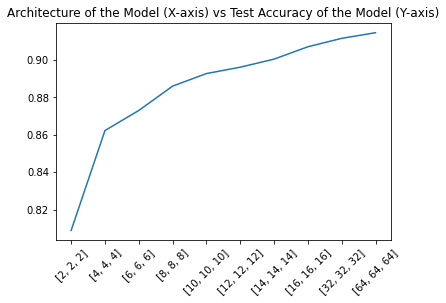

In [16]:
x_axis = [ "[2, 2, 2]", "[4, 4, 4]", "[6, 6, 6]", "[8, 8, 8]", "[10, 10, 10]", "[12, 12, 12]", "[14, 14, 14]", "[16, 16, 16]", "[32, 32, 32]", "[64, 64, 64]"]
y_axis = [ x[2] for x in model_results_part2 ]

dummy = [ i for i in range(1, len(x_axis) + 1)]

plt.clf()

plt.plot(dummy, y_axis)
plt.xticks(dummy, x_axis, rotation = 45)
plt.title("Architecture of the Model (X-axis) vs Test Accuracy of the Model (Y-axis)")
plt.show()

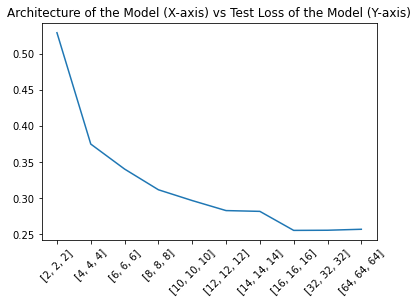

In [17]:
x_axis = [ "[2, 2, 2]", "[4, 4, 4]", "[6, 6, 6]", "[8, 8, 8]", "[10, 10, 10]", "[12, 12, 12]", "[14, 14, 14]", "[16, 16, 16]", "[32, 32, 32]", "[64, 64, 64]"]
y_axis = [ x[1] for x in model_results_part2 ]

dummy = [ i for i in range(1, len(x_axis) + 1)]

plt.clf()

plt.plot(dummy, y_axis)
plt.xticks(dummy, x_axis, rotation = 45)
plt.title("Architecture of the Model (X-axis) vs Test Loss of the Model (Y-axis)")
plt.show()